# Collapse operators
A notebook for exploring the collapse operators used in QuTip.

References:
 * https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/time-evolution/003_qubit-dynamics.ipynb

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## Single qubit Rabi - no collapse ops

In [21]:
# coefficients
omega = 2 * np.pi
g = 0.25

# hamiltonian
H = omega / 2.0 * sigmax()

# list of collapse operators
c_ops = [
        ]

# projector
Psm = sigmam().dag()*sigmam()

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

res = mesolve(H, psi0, tlist, c_ops, [Psm, sigmax(), sigmay(), sigmaz()])

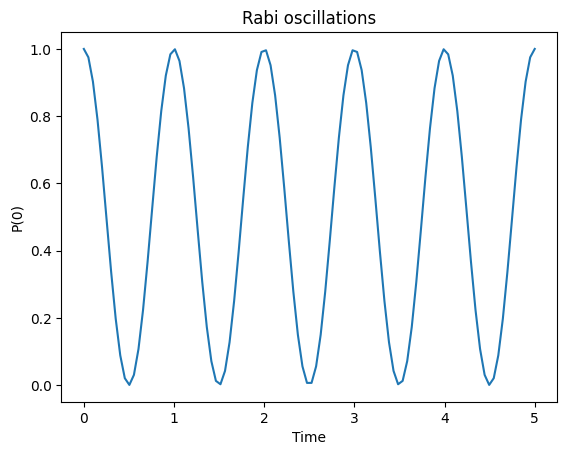

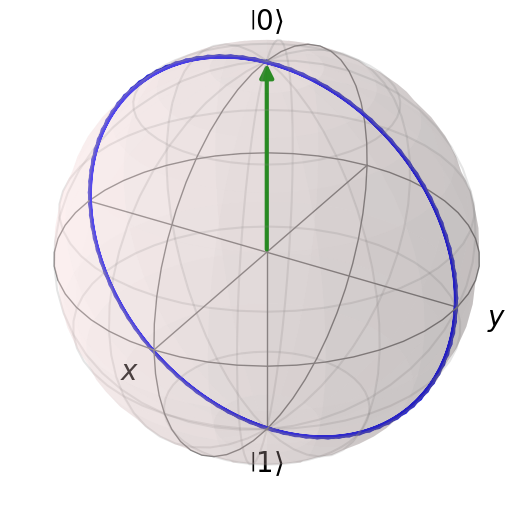

In [22]:
plt.plot(tlist, res.expect[0])
plt.xlabel("Time")
plt.ylabel("P(0)")
plt.title("Rabi oscillations")
plt.show()

_, exp_sx_relax, exp_sy_relax, exp_sz_relax = res.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()

## Single qubit dephasing

In [27]:
# coefficients
omega = 2 * np.pi
gamma = 0.5

# hamiltonian
H = omega / 2.0 * sigmax()

# list of collapse operators
c_ops = [
            np.sqrt(gamma) * sigmaz() # the dephasing operator - this gives finite T2*
        ]

# projector
Psm = sigmam().dag()*sigmam()

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

res = mesolve(H, psi0, tlist, c_ops, [Psm, sigmax(), sigmay(), sigmaz()])

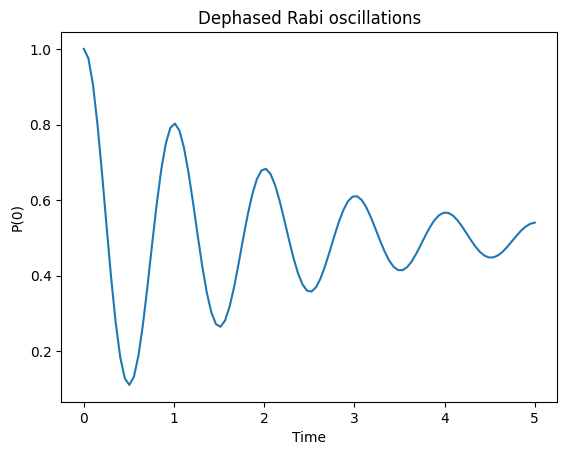

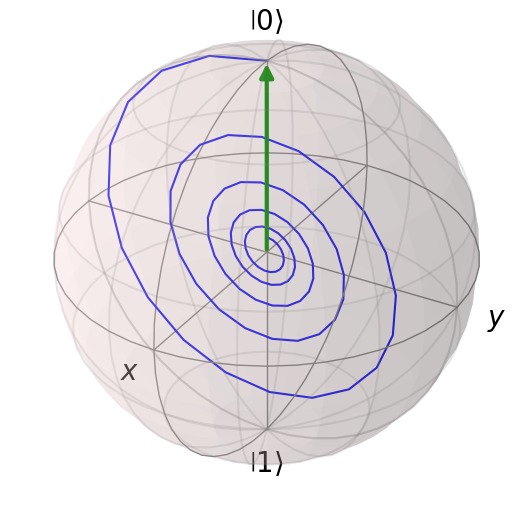

In [28]:
plt.plot(tlist, res.expect[0])
plt.xlabel("Time")
plt.ylabel("P(0)")
plt.title("Dephased Rabi oscillations")
plt.show()

_, exp_sx_relax, exp_sy_relax, exp_sz_relax = res.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()

## Single qubit relaxation

In [29]:
# coefficients
omega = 2 * np.pi
g = 0.5

# hamiltonian
H = omega / 2.0 * sigmax()

# list of collapse operators
c_ops = [
            np.sqrt(g) * sigmam() # the dephasing operator - this gives finite T1
        ]

# projector
Psm = sigmam().dag()*sigmam()

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

res = mesolve(H, psi0, tlist, c_ops, [Psm, sigmax(), sigmay(), sigmaz()])

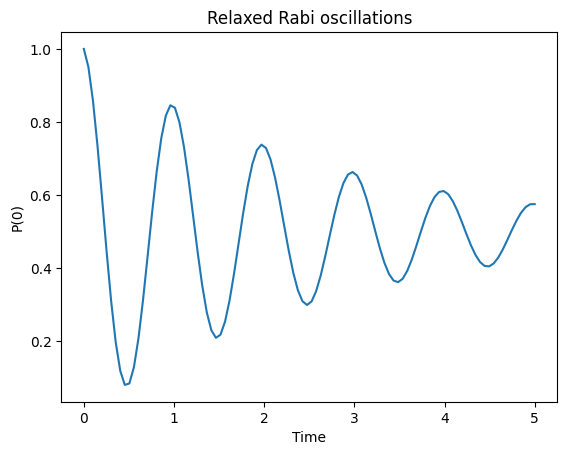

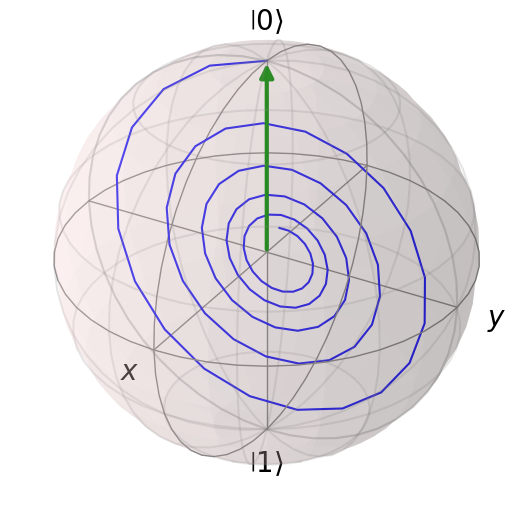

In [30]:
plt.plot(tlist, res.expect[0])
plt.xlabel("Time")
plt.ylabel("P(0)")
plt.title("Relaxed Rabi oscillations")
plt.show()

_, exp_sx_relax, exp_sy_relax, exp_sz_relax = res.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()